## 7장 2절 t-test

### 일표본 T-검정(One Sample t-test)

In [3]:
import pandas as pd

df_cats = pd.read_csv('./data/cats.csv')
df_cats.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


In [4]:
df_cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


In [6]:
import scipy.stats as stats
from scipy.stats import shapiro

mu=2.6
shapiro(df_cats['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730228778906167e-05)

In [7]:
stats.wilcoxon(df_cats['Bwt']-mu, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

In [10]:
import matplotlib.pyplot as plt

cats_Bwt_cnt = pd.value_counts(df_cats['Bwt'].values, sort=False)
cats_Bwt_cnt

2.0     5
2.1    10
2.2    14
2.3    13
2.4     9
2.5    10
2.6     9
2.7    12
2.9     8
3.0    11
2.8     7
3.1     6
3.2     6
3.3     5
3.4     5
3.5     5
3.6     4
3.7     1
3.8     2
3.9     2
Name: count, dtype: int64

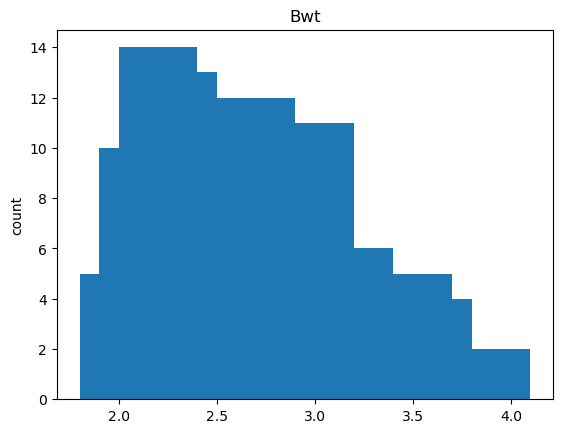

In [12]:
width=0.4
plt.bar(cats_Bwt_cnt.index, cats_Bwt_cnt.values, width)
plt.title('Bwt')
plt.ylabel('count')
plt.show()

### 대응표본 T-검정(Paired Sample t-test)

In [13]:
import pandas as pd

data = {'before':[7,3,4,5,2,1,6,6,5,4], 'after':[8,4,5,6,2,3,6,8,6,5]}
df_data = pd.DataFrame(data=data)
df_data

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [14]:
import scipy.stats as stats
from scipy.stats import shapiro


In [15]:
stats.ttest_rel(a=df_data['after'], b=df_data['before'], alternative='greater')

TtestResult(statistic=4.743416490252569, pvalue=0.0005269356285082764, df=9)

In [16]:
df_data.mean()

before    4.3
after     5.3
dtype: float64

### 독립표본 T-검정(Independent Sample t-test)

In [19]:
import pandas as pd

df_cats = pd.read_csv('./data/cats.csv')

df_fcat=df_cats.loc[df_cats['Sex']=='F', 'Bwt']
df_mcat=df_cats.loc[df_cats['Sex']=='M', 'Bwt']


In [21]:
import scipy.stats as stats

stats.levene(df_fcat, df_mcat)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [22]:
stats.ttest_ind(df_fcat, df_mcat, equal_var=False)

TtestResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15, df=136.83788299625363)

In [23]:
print(df_fcat.mean())
print(df_mcat.mean())

2.359574468085107
2.8999999999999995


In [28]:
type(df_fcat)

pandas.core.series.Series

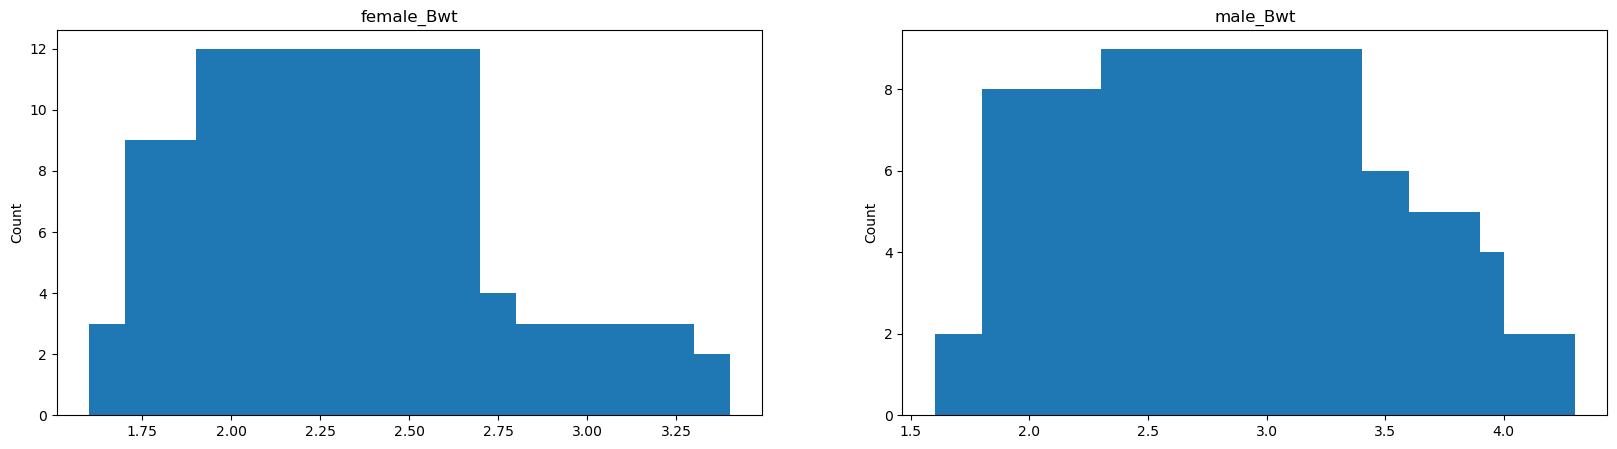

In [34]:
fcat_Bwt_cnt = pd.value_counts(df_fcat.values, sort=False)
mcat_Bwt_cnt = pd.value_counts(df_mcat.values, sort=False)

fig, axs = plt.subplots(1, 2, figsize = (20,5))
width = 0.4

axs[0].bar(fcat_Bwt_cnt.index, fcat_Bwt_cnt.values)
axs[0].set_title('female_Bwt')
axs[0].set_ylabel('Count')
axs[1].bar(mcat_Bwt_cnt.index, mcat_Bwt_cnt.values)
axs[1].set_title('male_Bwt')
axs[1].set_ylabel('Count')
plt.show()